# Prosper Loan Data
## by Bhasker Thodla

## Preliminary Wrangling

> The dataset includes about 114,000 loan records from Prosper Loans, a company founded in 2005 to facilitate peer-to-peer lending in the US. The loan data is duly obfuscated to hide the identities of both borrowers and lenders and contains no peronally identifiable information (PII) to protect the privacy of the participants.

> The loan data provided ranges over a period from Nov 2005 to Mar 2014 (by loan origination date)

> The data is mostly clean although there are missing values in several fields

> No data wrangling has been done on this data



In [90]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
# from google.colab import drive
%matplotlib inline

# To supporess budget and revenue values from being returned in exponential format
pd.options.display.float_format = '{:20,.2f}'.format


> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [12]:
# Loading the Prosper Loan data saved in Google Drive
# from google.colab import drive

# drive.mount('/content/gdrive')
# data_folder = '/content/gdrive/My Drive/Colab Notebooks/data_visualization/prj5/prosperLoanData.csv'
data_folder = 'C:\\Users\\bhask\\Google Drive\\Colab Notebooks\\data_visualization\\prj5\\'
prosper_loan_data_file = data_folder + 'prosperLoanData.csv'
pld_full_df = pd.read_csv(prosper_loan_data_file)

In [13]:
# Some cleanup
# We will begin with renaming some columns

pld_full_df = pld_full_df.rename(columns = {'ProsperRating (numeric)': 'ProsperRating', 'ProsperRating (Alpha)': 'ProsperRatingStr', 'ListingCategory (numeric)': 'ListingCategory', 'TradesNeverDelinquent (percentage)': 'TradesNeverDelinquentPct'})

# We will then pick a subset of columns for analysis and exclude the rest by creating a new dataframe
sel_columns = [
    'ListingKey',
    'LoanStatus',
    'ProsperRatingStr',
    'ListingCategory',
    'BorrowerState',
    'CreditGrade',
    'ProsperScore',
    'IncomeRange',
    'BorrowerRate',
    'AmountDelinquent',
    'StatedMonthlyIncome',
    'LoanOriginalAmount',
    'LoanOriginationDate',
    'LP_NetPrincipalLoss',
    'Term',
    'CurrentDelinquencies',
    'LoanCurrentDaysDelinquent'
]


pld_df = pld_full_df[sel_columns]

### What is the structure of your dataset?

> After selecting a subset of columns from the dataset (after discarding some that I will not be using in my analysis) into a new dataframe, I have classified the elements in my dataset into their respective types. This classification is given below:


# Classification of data fields

Key
* ListingKey: I am using this as the key to each row in the dataset

Qualitative - Nominal (Bar Charts - descending order of values - use countplot() function)
* LoanStatus
* ListingCategory
* BorrowerState

Qualitative - Ordinal (Bar Charts - order of rating - use Seaborn's countplot() function)
* CreditGrade
* ProsperRating
* ProsperScore
* IncomeRange

Quantitative - Continuous (Histograms - use hist() or distplot() functions)
* BorrowerRate
* AmountDelinquent
* StatedMonthlyIncome
* LoanOriginalAmount
* LP_NetPrincipalLoss

Quantitative - Discrete (Bar Charts - use  countplot() function)
* Term
* CurrentDelinquencies
* LoanCurrentDaysDelinquent

Quantitative - Interval (Line plots using errorbar() function)
* LoanOriginationDate

### What is/are the main feature(s) of interest in your dataset?

> Distribution of Loan/Delinquent Loan/Net Principal Loss/Borrower Rate by
>* Geographic location (State)
>* Income Range
>* Listing Category

> Aggregation of Loan/Delinquent Loan/Net Principal Loss by 
>* Rating
>* Credit Score
>* Loan Status


In [14]:
# Some preliminary statistics about the data
print ('%s %s' % ('Number of rows and columns: ', pld_df.shape))
# print (pld_df.describe())

Number of rows and columns:  (113937, 17)


In [15]:
pld_df.groupby('LoanStatus').size()

LoanStatus
Cancelled                     5
Chargedoff                11992
Completed                 38074
Current                   56576
Defaulted                  5018
FinalPaymentInProgress      205
Past Due (1-15 days)        806
Past Due (16-30 days)       265
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (>120 days)         16
dtype: int64

In [16]:
pld_df.groupby('ProsperRatingStr').size()

ProsperRatingStr
A     14551
AA     5372
B     15581
C     18345
D     14274
E      9795
HR     6935
dtype: int64

In [17]:
pld_df['ListingCategoryStr'] = pld_df['ListingCategory'].map({
        0: 'Not Available', 
        1: 'Debt Consolidation', 
        2: 'Home Improvement', 
        3: 'Business', 
        4: 'Personal Loan', 
        5: 'Student Use', 
        6: 'Auto', 
        7: 'Other', 
        8: 'Baby&Adoption', 
        9: 'Boat', 
        10: 'Cosmetic Procedure', 
        11: 'Engagement Ring', 
        12: 'Green Loans', 
        13: 'Household Expenses', 
        14: 'Large Purchases', 
        15: 'Medical/Dental', 
        16: 'Motorcycle', 
        17: 'RV', 
        18: 'Taxes', 
        19: 'Vacation', 
        20: 'Wedding Loans'})

pld_df['ListingCategoryStr'].value_counts()

C:\Users\bhask\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Debt Consolidation    58308
Not Available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingCategoryStr, dtype: int64

In [18]:
pld_df['CombCreditRating'] = pld_df['CreditGrade'].fillna(pld_df['ProsperRatingStr'])

C:\Users\bhask\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
pld_df.groupby('ProsperScore').size()

ProsperScore
1.0       992
2.0      5766
3.0      7642
4.0     12595
5.0      9813
6.0     12278
7.0     10597
8.0     12053
9.0      6911
10.0     4750
11.0     1456
dtype: int64

In [20]:
pld_df.groupby('IncomeRange').size()

IncomeRange
$0                  621
$1-24,999          7274
$100,000+         17337
$25,000-49,999    32192
$50,000-74,999    31050
$75,000-99,999    16916
Not displayed      7741
Not employed        806
dtype: int64

In [33]:
pld_df.groupby('BorrowerRate').size()

BorrowerRate
0.0000       8
0.0001       1
0.0005       1
0.0021       1
0.0050       1
0.0099       1
0.0100      11
0.0115       1
0.0150       1
0.0295       1
0.0300       8
0.0345       1
0.0350       1
0.0395       1
0.0400      12
0.0423       1
0.0425       2
0.0435       1
0.0440       1
0.0450       2
0.0480       1
0.0481       1
0.0489       1
0.0490       1
0.0495       2
0.0498       1
0.0499      46
0.0500      59
0.0509       1
0.0510       1
          ... 
0.3461       1
0.3464       1
0.3465       3
0.3470       4
0.3475      14
0.3476       1
0.3478       1
0.3480      11
0.3484       3
0.3485       8
0.3487       1
0.3489       1
0.3490       7
0.3492       6
0.3494       6
0.3495      37
0.3496       1
0.3497       2
0.3498       4
0.3499      27
0.3500    1905
0.3530       1
0.3570       2
0.3575      21
0.3600      17
0.3750       1
0.4000       2
0.4500       3
0.4800       1
0.4975       2
Length: 2294, dtype: int64

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

* The large volumne of data (about 114k loan records)
* The following features of borrowers
    * Geographic distribution
    * Income range
    * Rating
    * Credit Score
* The following features of the loans themselves
    * 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

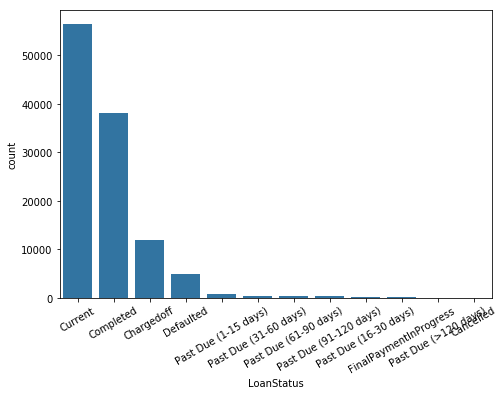

In [21]:
# Distribution of Loan Status
gen_order = pld_df['LoanStatus'].value_counts().index
fig = plt.figure()
ax = fig.add_axes([.125, .125, 1.0, 1.0])
base_color = sb.color_palette()[0]
sb.countplot(data = pld_df, x = 'LoanStatus', color = base_color, ax = ax, order = gen_order)
plt.xticks(rotation = 30);


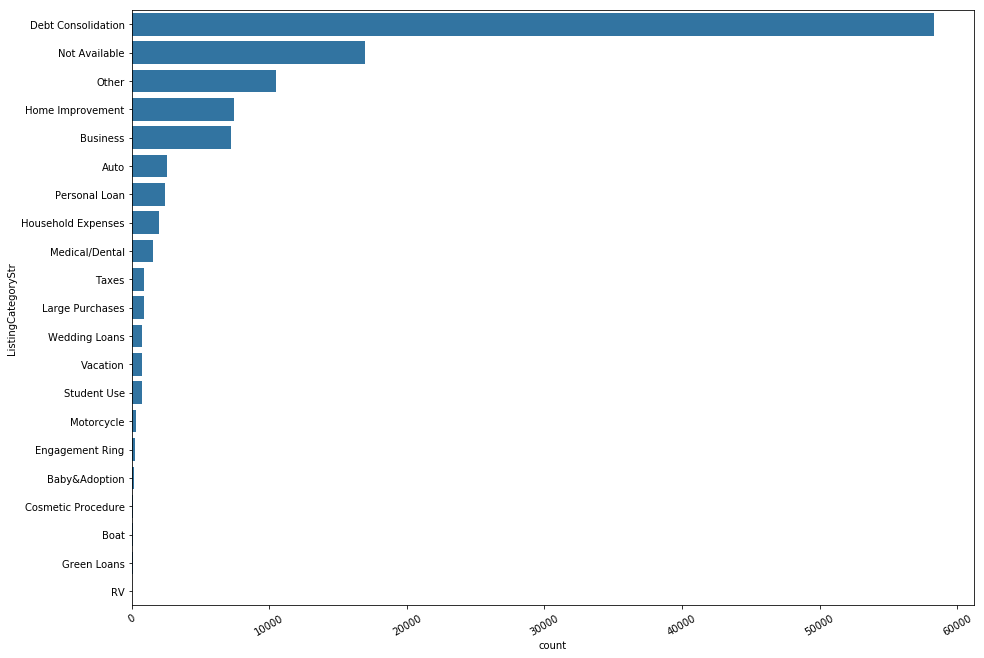

In [22]:
# Distribution of Listing Category
gen_order = pld_df['ListingCategoryStr'].value_counts().index
fig = plt.figure()
ax = fig.add_axes([.125, .125, 1.0, 1.0])
base_color = sb.color_palette()[0]
fig.set_size_inches(11.7, 8.27)
sb.countplot(data = pld_df, y = 'ListingCategoryStr', color = base_color, ax = ax, order = gen_order)
plt.xticks(rotation = 30);

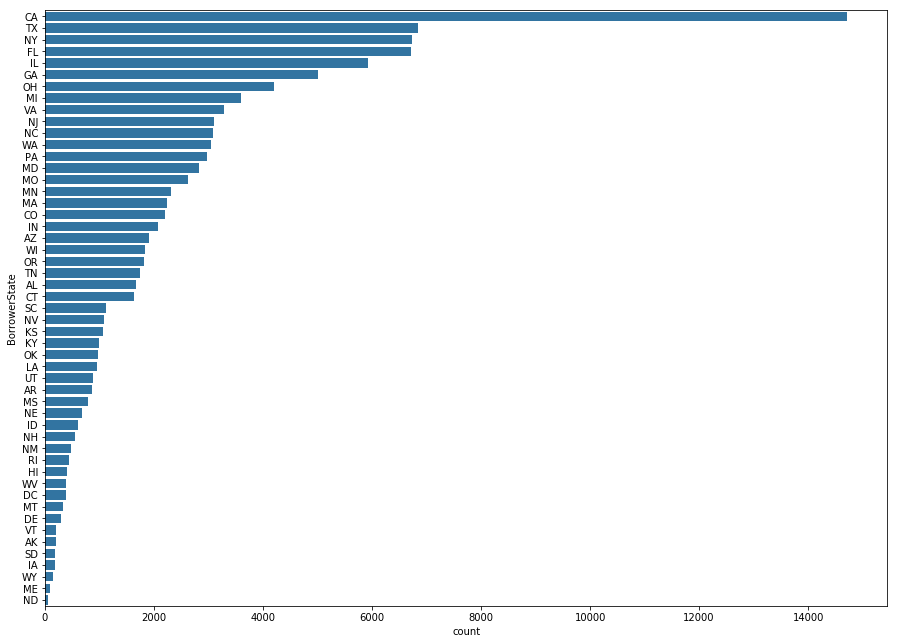

In [23]:
# Distribution of Borrower State
gen_order = pld_df['BorrowerState'].value_counts().index
fig = plt.figure()
ax = fig.add_axes([.125, .125, 1.0, 1.0])
base_color = sb.color_palette()[0]
fig.set_size_inches(11.7, 8.27)
sb.countplot(data = pld_df, y = 'BorrowerState', color = base_color, ax = ax, order = gen_order)
# plt.xticks(rotation = 90);

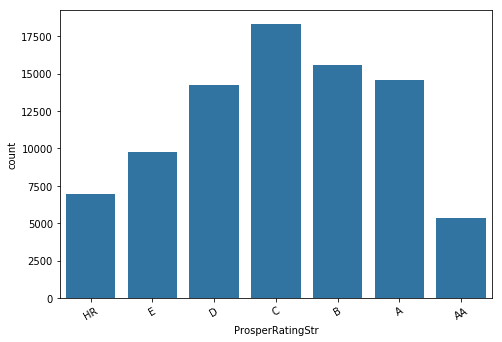

In [26]:
# Distribution of Prosper Rating

level_order = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
fig = plt.figure()
ax = fig.add_axes([.125, .125, 1.0, 1.0])
base_color = sb.color_palette()[0]
sb.countplot(data = pld_df, x = 'ProsperRatingStr', color = base_color, ax = ax, order = level_order)
plt.xticks(rotation = 30);

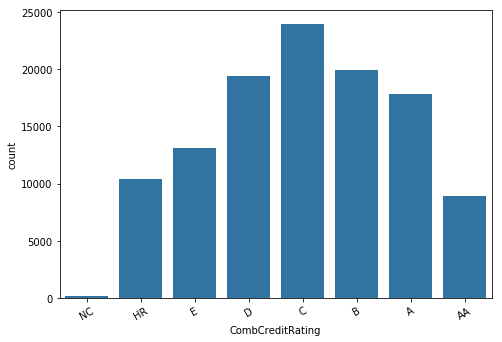

In [27]:
# Distribution of Combined Credit Rating
level_order_credit_grade = ['NC', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']
fig = plt.figure()
ax = fig.add_axes([.125, .125, 1.0, 1.0])
base_color = sb.color_palette()[0]
sb.countplot(data = pld_df, x = 'CombCreditRating', color = base_color, ax = ax, order = level_order_credit_grade)
plt.xticks(rotation = 30);


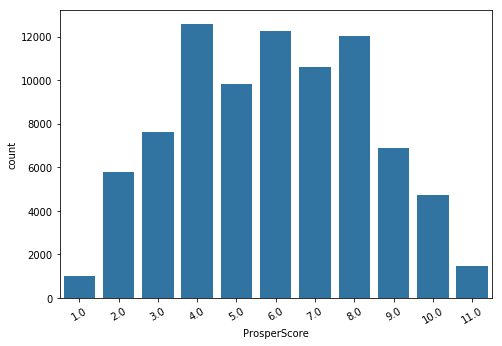

In [28]:
# Distribution of Prosper Score

fig = plt.figure()
ax = fig.add_axes([.125, .125, 1.0, 1.0])
base_color = sb.color_palette()[0]
sb.countplot(data = pld_df, x = 'ProsperScore', color = base_color, ax = ax)
plt.xticks(rotation = 30);

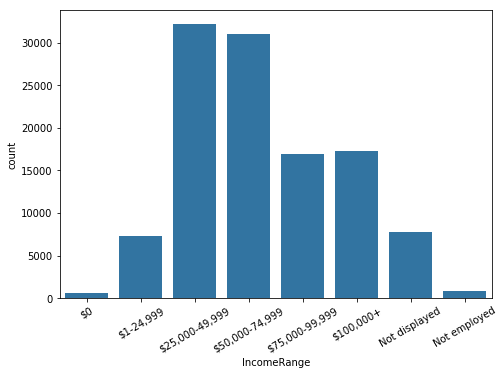

In [31]:
# Distribution of Income Range

level_order_income_range = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not displayed', 'Not employed']
fig = plt.figure()
ax = fig.add_axes([.125, .125, 1.0, 1.0])
base_color = sb.color_palette()[0]
sb.countplot(data = pld_df, x = 'IncomeRange', color = base_color, ax = ax, order = level_order_income_range)
plt.xticks(rotation = 30);

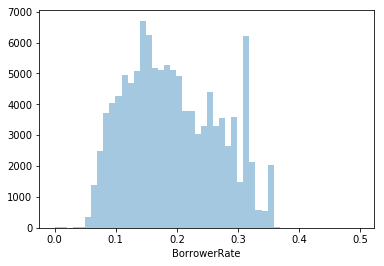

In [37]:
# Plotting Borrower Rate

bins = np.arange(0, pld_df['BorrowerRate'].max() + .01, .01)
# plt.hist(data = pld_df, x = 'BorrowerRate', bins = bins);
sb.distplot(pld_df['BorrowerRate'], kde = False);


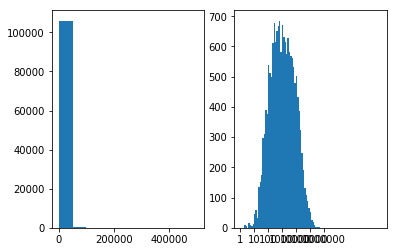

In [85]:
# Plotting AmountDelinquent
# Before plotting, let us remove the rows where it is zero
# pld_df_ad = pld_df.query('AmountDelinquent != 0')

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bins = np.arange(pld_df['AmountDelinquent'].min(), pld_df['AmountDelinquent'].max() + 50000, 50000)
plt.hist(data = pld_df, x = 'AmountDelinquent', bins = bins);

plt.subplot(1, 2, 2)
log_bin_edges = 10 ** np.arange(0.1, 10 + 0.1, 0.1)
ticks = [1, 10, 100, 1000, 10000, 100000, 1000000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = pld_df, x = 'AmountDelinquent', bins = log_bin_edges);
plt.xscale('log')
plt.xticks(ticks, labels);

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

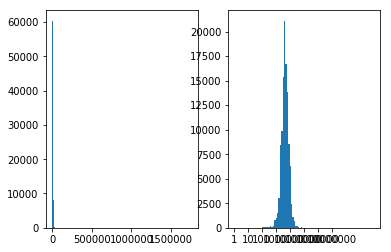

In [105]:
# Plotting AmountDelinquent

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bins = np.arange(pld_df['StatedMonthlyIncome'].min(), pld_df['StatedMonthlyIncome'].max() + 5000, 5000)
plt.hist(data = pld_df, x = 'StatedMonthlyIncome', bins = bins);

plt.subplot(1, 2, 2)
log_bin_edges = 10 ** np.arange(0.1, 10 + 0.1, 0.1)
ticks = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = pld_df, x = 'StatedMonthlyIncome', bins = log_bin_edges);
plt.xscale('log')
plt.xticks(ticks, labels);


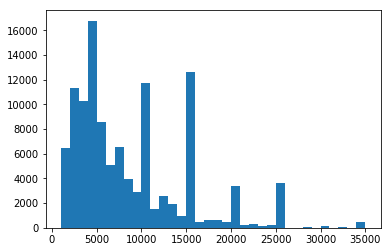

In [117]:
# Plotting LoanOriginalAmount

# left histogram: data plotted in natural units
bins = np.arange(pld_df['LoanOriginalAmount'].min(), pld_df['LoanOriginalAmount'].max() + 1000, 1000)
plt.hist(data = pld_df, x = 'LoanOriginalAmount', bins = bins);


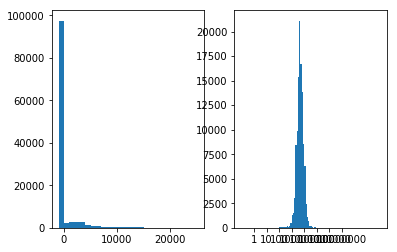

In [120]:
# Plotting LP_NetPrincipalLoss

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bins = np.arange(pld_df['LP_NetPrincipalLoss'].min(), pld_df['LP_NetPrincipalLoss'].max() + 1000, 1000)
plt.hist(data = pld_df, x = 'LP_NetPrincipalLoss', bins = bins);

# pld_df['LP_NetPrincipalLoss'].describe()

plt.subplot(1, 2, 2)
log_bin_edges = 10 ** np.arange(-1, 10 + 0.1, 0.1)
ticks = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = pld_df, x = 'StatedMonthlyIncome', bins = log_bin_edges);
plt.xscale('log')
plt.xticks(ticks, labels);


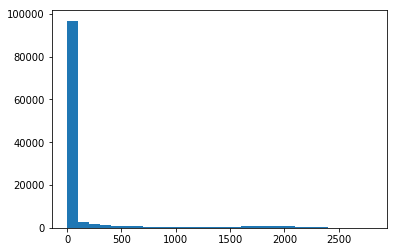

In [128]:
bins = np.arange(pld_df['LoanCurrentDaysDelinquent'].min(), pld_df['LoanCurrentDaysDelinquent'].max() + 100, 100)
plt.hist(data = pld_df, x = 'LoanCurrentDaysDelinquent', bins = bins);

# pld_df['LoanCurrentDaysDelinquent'].describe()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!